In [16]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [17]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 589


In [20]:
import requests
from citipy import citipy
import numpy as np
import json
#  OpenWeatherMap API key
api_key = "9c8de1406cfacf09eb58030206529b87"
base_url = "https://api.openweathermap.org/data/2.5/weather?appid=" + api_key

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = base_url + "&q=" +city 
    
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try: 
        city_weather = requests.get(city_url).json()

        #print(city_weather)
        
        # Parse the JSON and retrieve data
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")



Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mercedes
{'coord': {'lon': -59.4307, 'lat': -34.6515}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 291.98, 'feels_like': 292.35, 'temp_min': 291.84, 'temp_max': 293.07, 'pressure': 1006, 'humidity': 93, 'sea_level': 1006, 'grnd_level': 1001}, 'visibility': 10000, 'wind': {'speed': 4.14, 'deg': 59, 'gust': 7.96}, 'clouds': {'all': 94}, 'dt': 1704668260, 'sys': {'type': 2, 'id': 2075224, 'country': 'AR', 'sunrise': 1704617564, 'sunset': 1704669265}, 'timezone': -10800, 'id': 3430708, 'name': 'Mercedes', 'cod': 200}
City not found. Skipping...
Processing Record 2 of Set 1 | alesund
{'coord': {'lon': 6.1549, 'lat': 62.4723}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 274.58, 'feels_like': 270.23, 'temp_min': 267.66, 'temp_max': 275.

In [28]:
# Convert the cities weather data into a Pandas DataFrame

city_data_df = pd.read_csv('cities.csv') 

# Show Record Count
city_data_df.count()

City_ID       577
City          577
Lat           577
Lng           577
Max Temp      577
Humidity      577
Cloudiness    577
Wind Speed    577
Country       574
Date          577
dtype: int64

In [29]:
# Display sample data
city_data_df.head()

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
2,2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
3,3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230


In [31]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [32]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City_ID.1,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,,
0,0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
2,2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
3,3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230


CREATE A SCATTER PLOT REQUESTED

Latitude vs. Temperature

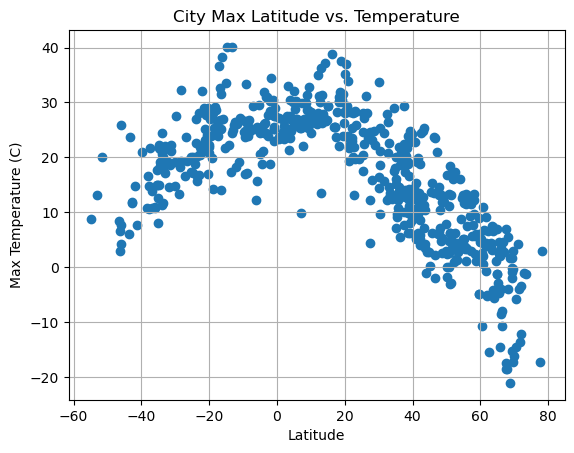

In [35]:
import matplotlib.pyplot as plt


plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'])
# Adding a title
plt.title('City Max Latitude vs. Temperature') 
# Label for the x-axis
plt.xlabel('Latitude') 
# Label for the y-axis
plt.ylabel('Max Temperature (C)') 
# Adding a grid for better readability
plt.grid(True) 
# Display the plot
plt.show() 


Latitude vs. Humidity

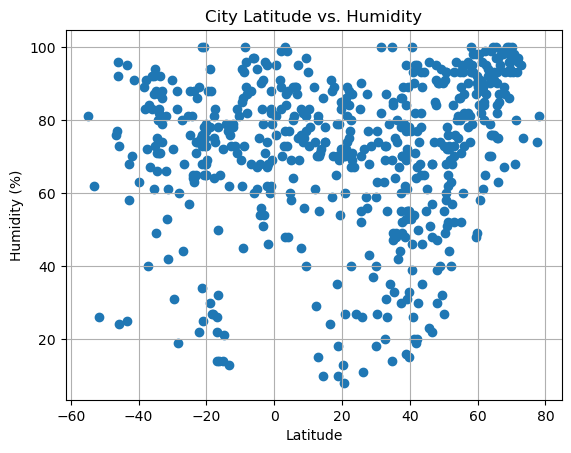

In [36]:
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'])
# Adding a title
plt.title('City Latitude vs. Humidity') 
# Label for the x-axis
plt.xlabel('Latitude') 
# Label for the y-axis
plt.ylabel('Humidity (%)') 
# Adding a grid for better readability
plt.grid(True) 
# Display the plot
plt.show() 

Latitude vs. Cloudiness

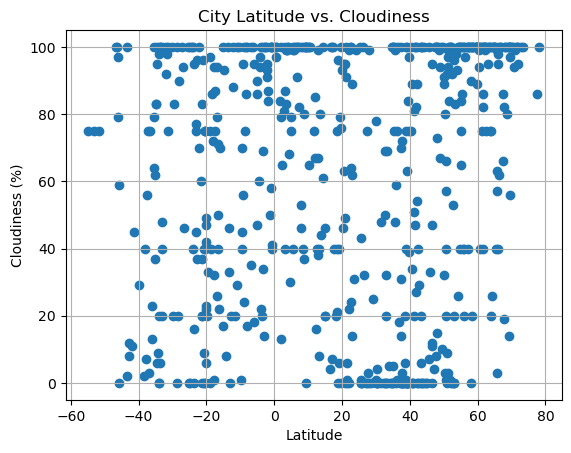

In [37]:
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'])
# Adding a title
plt.title('City Latitude vs. Cloudiness') 
# Label for the x-axis
plt.xlabel('Latitude') 
# Label for the y-axis
plt.ylabel('Cloudiness (%)') 
# Adding a grid for better readability
plt.grid(True) 
# Display the plot
plt.show() 

Latitude vs. Wind Speed

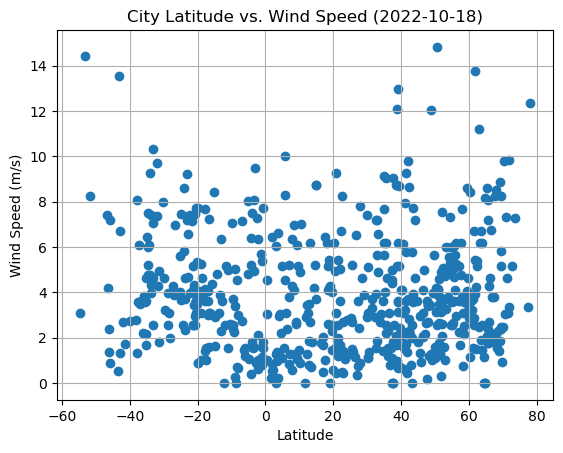

In [39]:
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'])
# Adding a title
plt.title('City Latitude vs. Wind Speed (2022-10-18)') 
# Label for the x-axis
plt.xlabel('Latitude') 
# Label for the y-axis
plt.ylabel('Wind Speed (m/s)') 
# Adding a grid for better readability
plt.grid(True) 
# Display the plot
plt.show() 

Compute Linear Relationship of Each Relationship

C:\Users\nickn\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


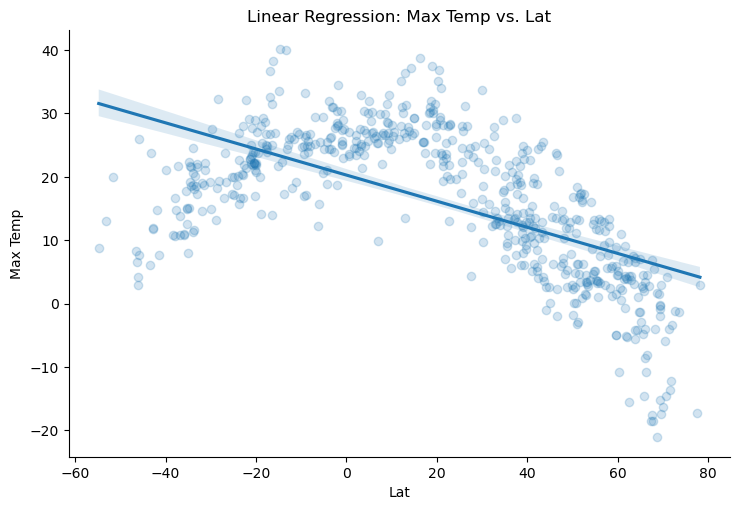

In [40]:
# Create Linear Regression Plots- Test out Max temp vs Latitude 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Function to create a linear regression plot
def create_linear_regression_plot(dataframe, x_variable, y_variable):
    # Create the plot
    sns.lmplot(x=x_variable, y=y_variable, data=dataframe, aspect=1.5, scatter_kws={'alpha':0.2})
    
    # Set the title and labels
    plt.title(f'Linear Regression: {y_variable} vs. {x_variable}')
    plt.xlabel(x_variable)
    plt.ylabel(y_variable)
    
    # Show the plot
    plt.show()

# Assuming you have a DataFrame named df that contains your data
# df = pd.read_csv('your_data.csv')  # If you were to load the data from a CSV file

# Call the function with the DataFrame and column names
# Replace 'Lat' and 'Max Temp' with the actual column names from your DataFrame
create_linear_regression_plot(city_data_df, 'Lat', 'Max Temp')


In [41]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemisphere_df = city_data_df[city_data_df['Lat'] >= 0]
northern_hemisphere_df.head()

,City_ID.1,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,,
0,0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
3,3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230
6,6,albany,42.6001,-73.9662,10.36,74,29,2.10,US,1666108231


In [43]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemisphere_df = city_data_df[city_data_df['Lat'] <= 0]
southern_hemisphere_df.head()

,City_ID.1,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,,
2,2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
5,5,ushuaia,-54.8000,-68.3000,8.81,81,75,3.09,AR,1666108231
7,7,carnarvon,-24.8667,113.6333,20.02,76,0,7.46,AU,1666108232
9,9,saint-pierre,-21.3393,55.4781,22.82,68,0,5.14,RE,1666108236
10,10,colorado,-22.8375,-51.9731,20.36,86,96,4.69,BR,1666107965


Temperature vs. Latitude Linear Regression Plot

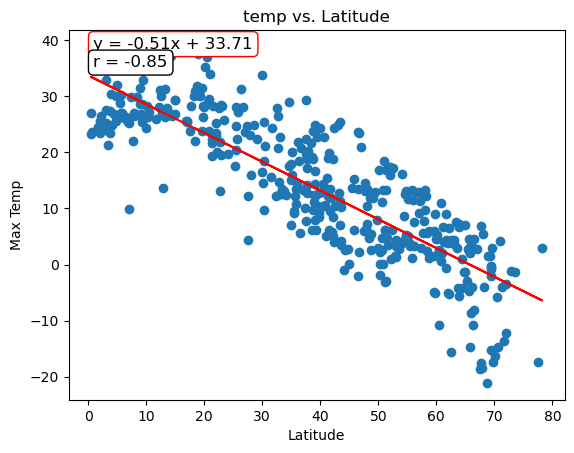

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Function to create a scatter plot with a linear regression line
def plot_linear_regression(x_data, y_data, x_label, y_label, title):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_data, y_data)
    
    # Create a scatter plot of the data
    plt.scatter(x_data, y_data)
    
    # Calculate the regression line "y values" from the slope and intercept
    reg_values = x_data * slope + intercept
    
    # Plot the regression line
    plt.plot(x_data, reg_values, "r-")
    
    # Annotate the slope and intercept on the plot
    plt.annotate('y = {:.2f}x + {:.2f}'.format(slope, intercept), xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12,
                 bbox=dict(boxstyle="round,pad=0.3", edgecolor='red', facecolor='white', ))
    
    # Annotate the r value (correlation coefficient)
    plt.annotate('r = {:.2f}'.format(r_value), xy=(0.05, 0.90), xycoords='axes fraction', fontsize=12,
                 bbox=dict(boxstyle="round,pad=0.3", facecolor='white', ))
    
    # Add labels and title
    plt.xlabel('Latitude')
    plt.ylabel('Max Temp')
    plt.title('temp vs. Latitude')
    
    # Show plot
    plt.show()
    
    # Return the slope, intercept, and r_value
    return slope, intercept, r_value

# Northern Hemisphere DataFrame
northern_df = northern_hemisphere_df[northern_hemisphere_df['Lat'] >= 0]

# Call the function with relevant columns
slope, intercept, r_value = plot_linear_regression(northern_df['Lat'], northern_df['Max Temp'], 'Latitude', 'Max Temperature (C)', 'Northern Hemisphere - Max Temp vs. Latitude')


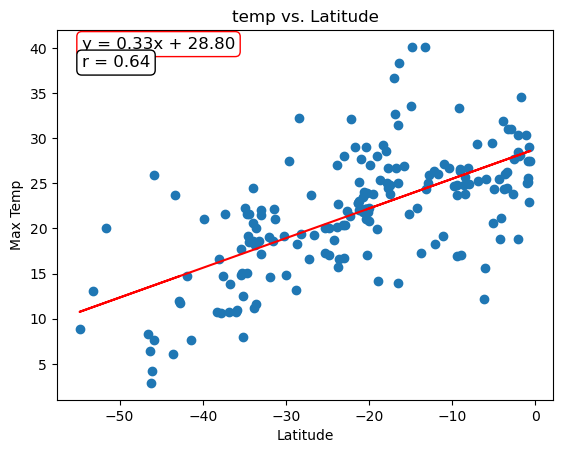

In [48]:
# Function to create a scatter plot with a linear regression line
def plot_linear_regression(x_data, y_data, x_label, y_label, title):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_data, y_data)
    
    # Create a scatter plot of the data
    plt.scatter(x_data, y_data)
    
    # Calculate the regression line "y values" from the slope and intercept
    reg_values = x_data * slope + intercept
    
    # Plot the regression line
    plt.plot(x_data, reg_values, "r-")
    
    # Annotate the slope and intercept on the plot
    plt.annotate('y = {:.2f}x + {:.2f}'.format(slope, intercept), xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12,
                 bbox=dict(boxstyle="round,pad=0.3", edgecolor='red', facecolor='white', ))
    
    # Annotate the r value (correlation coefficient)
    plt.annotate('r = {:.2f}'.format(r_value), xy=(0.05, 0.90), xycoords='axes fraction', fontsize=12,
                 bbox=dict(boxstyle="round,pad=0.3", facecolor='white', ))
    
    # Add labels and title
    plt.xlabel('Latitude')
    plt.ylabel('Max Temp')
    plt.title('temp vs. Latitude')
    
    # Show plot
    plt.show()
    
    # Return the slope, intercept, and r_value
    return slope, intercept, r_value

# Southern Hemisphere DataFrame
southern_df = southern_hemisphere_df[southern_hemisphere_df['Lat'] <= 0]

# Call the function with relevant columns
slope, intercept, r_value = plot_linear_regression(southern_df['Lat'], southern_df['Max Temp'], 'Latitude', 'Max Temperature (C)', 'Southern Hemisphere - Max Temp vs. Latitude')


Discussion about the Linear Relationship: 

In the first plot, representing the Northern Hemisphere, the negative slope of the line (y = -0.51x + 33.71) indicates that as the latitude increases, the temperature decreases. This is expected, as moving away from the equator towards the poles generally leads to cooler temperatures. The R-value provided suggests a strong negative correlation, meaning that latitude is a good predictor of temperature in the Northern Hemisphere. As the r value in the Northern Hemisphere is -0.8, it shows a strong negative correlation.  The relationship between temperature and latitude is inverse. 

The second plot, for the Southern Hemisphere, shows a positive slope (y = 0.33x + 28.8), which suggests that as the latitude value (here, latitudes are negative as they are in the southern part of the globe) increases, or gets closer to zero, the temperature rises. This is consistent with moving closer to the equator where temperatures are typically warmer. The R-value here also suggests a strong correlation, although it's not as strong as in the Northern Hemisphere, which could indicate other factors affecting temperature in addition to latitude. The r value of 0.6 indicates a moderate positive correlation. This is a measure of direct relationship between the two variables.

Overall, these plots underscore the general climatological pattern that temperatures decrease with distance from the equator and highlight the effectiveness of linear regression in quantifying this relationship

Cloudiness vs. Latitude Linear Regression Plot 

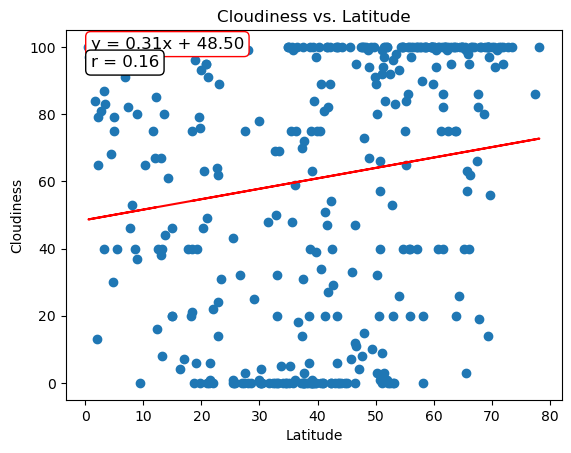

In [50]:
# Northern Hemisphere
# Function to create a scatter plot with a linear regression line
def plot_linear_regression(x_data, y_data, x_label, y_label, title):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_data, y_data)
    
    # Create a scatter plot of the data
    plt.scatter(x_data, y_data)
    
    # Calculate the regression line "y values" from the slope and intercept
    reg_values = x_data * slope + intercept
    
    # Plot the regression line
    plt.plot(x_data, reg_values, "r-")
    
    # Annotate the slope and intercept on the plot
    plt.annotate('y = {:.2f}x + {:.2f}'.format(slope, intercept), xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12,
                 bbox=dict(boxstyle="round,pad=0.3", edgecolor='red', facecolor='white', ))
    
    # Annotate the r value (correlation coefficient)
    plt.annotate('r = {:.2f}'.format(r_value), xy=(0.05, 0.90), xycoords='axes fraction', fontsize=12,
                 bbox=dict(boxstyle="round,pad=0.3", facecolor='white', ))
    
    # Add labels and title
    plt.xlabel('Latitude')
    plt.ylabel('Cloudiness')
    plt.title('Cloudiness vs. Latitude')
    
    # Show plot
    plt.show()
    
    # Return the slope, intercept, and r_value
    return slope, intercept, r_value

# Northern Hemisphere DataFrame
northern_df = northern_hemisphere_df[northern_hemisphere_df['Lat'] >= 0]

# Call the function with relevant columns
slope, intercept, r_value = plot_linear_regression(northern_df['Lat'], northern_df['Cloudiness'], 'Latitude', 'Cloudiness', 'Northern Hemisphere - Cloudiness vs. Latitude')


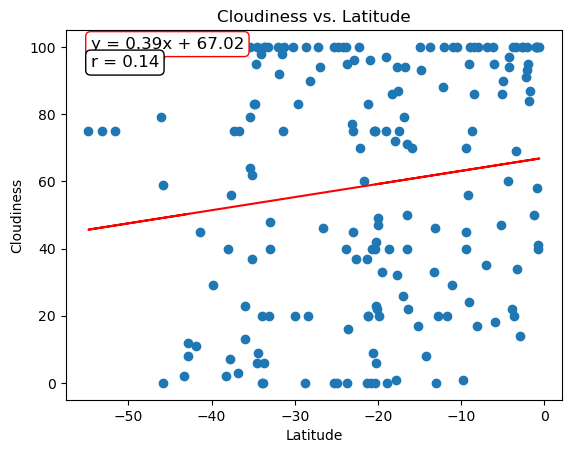

In [51]:
#Southern Hemisphere
# Function to create a scatter plot with a linear regression line
def plot_linear_regression(x_data, y_data, x_label, y_label, title):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_data, y_data)
    
    # Create a scatter plot of the data
    plt.scatter(x_data, y_data)
    
    # Calculate the regression line "y values" from the slope and intercept
    reg_values = x_data * slope + intercept
    
    # Plot the regression line
    plt.plot(x_data, reg_values, "r-")
    
    # Annotate the slope and intercept on the plot
    plt.annotate('y = {:.2f}x + {:.2f}'.format(slope, intercept), xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12,
                 bbox=dict(boxstyle="round,pad=0.3", edgecolor='red', facecolor='white', ))
    
    # Annotate the r value (correlation coefficient)
    plt.annotate('r = {:.2f}'.format(r_value), xy=(0.05, 0.90), xycoords='axes fraction', fontsize=12,
                 bbox=dict(boxstyle="round,pad=0.3", facecolor='white', ))
    
    # Add labels and title
    plt.xlabel('Latitude')
    plt.ylabel('Cloudiness')
    plt.title('Cloudiness vs. Latitude')
    
    # Show plot
    plt.show()
    
    # Return the slope, intercept, and r_value
    return slope, intercept, r_value

# Southern Hemisphere DataFrame
southern_df = southern_hemisphere_df[southern_hemisphere_df['Lat'] <= 0]

# Call the function with relevant columns
slope, intercept, r_value = plot_linear_regression(southern_df['Lat'], southern_df['Cloudiness'], 'Latitude', 'Cloudiness', 'southern Hemisphere - Cloudiness vs. Latitude')


In [ ]:
Discussion about the Linear Relationship: 

For the Northern Hemisphere:The R-value is approximately 0.16, indicating a low positive correlation between cloudiness and latitude. This suggests that as one moves northward from the equator, there is a slight increase in cloudiness, but the relationship is not strong.
For the Southern Hemisphere: The R-value is around 0.14, which also signifies a low positive correlation. This indicates a slight increase in cloudiness as one moves away from the equator toward the south, but again, the relationship is weak.
Both plots show that while there is a positive trend in cloudiness as latitude increases in both hemispheres, the correlation is relatively weak. This means there are many other factors that can affect cloudiness aside from latitude. The presence of outliers or variability in the data points may contribute to the weak correlation. These results suggest that predicting cloudiness based solely on latitude would be unreliable. The linear regression line in each plot provides a way to visualize this relationship, with the slope indicating the direction and rate of change. However, given the low R-values, it's clear that latitude is not a strong predictor of cloudiness in this dataset.

Wind Speed vs. Latitude Linear Regression Plot

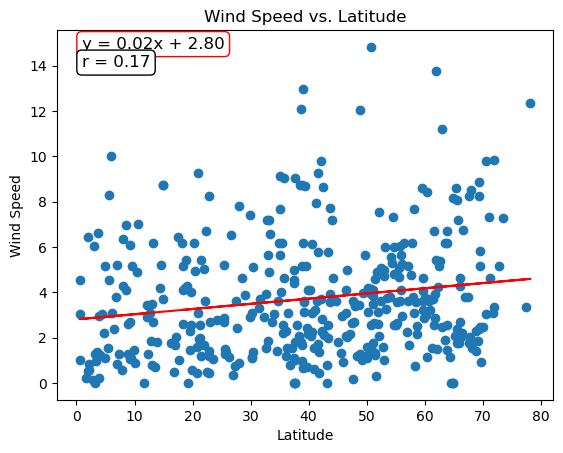

In [52]:
# Northern Hemisphere
# Function to create a scatter plot with a linear regression line
def plot_linear_regression(x_data, y_data, x_label, y_label, title):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_data, y_data)
    
    # Create a scatter plot of the data
    plt.scatter(x_data, y_data)
    
    # Calculate the regression line "y values" from the slope and intercept
    reg_values = x_data * slope + intercept
    
    # Plot the regression line
    plt.plot(x_data, reg_values, "r-")
    
    # Annotate the slope and intercept on the plot
    plt.annotate('y = {:.2f}x + {:.2f}'.format(slope, intercept), xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12,
                 bbox=dict(boxstyle="round,pad=0.3", edgecolor='red', facecolor='white', ))
    
    # Annotate the r value (correlation coefficient)
    plt.annotate('r = {:.2f}'.format(r_value), xy=(0.05, 0.90), xycoords='axes fraction', fontsize=12,
                 bbox=dict(boxstyle="round,pad=0.3", facecolor='white', ))
    
    # Add labels and title
    plt.xlabel('Latitude')
    plt.ylabel('Wind Speed')
    plt.title('Wind Speed vs. Latitude')
    
    # Show plot
    plt.show()
    
    # Return the slope, intercept, and r_value
    return slope, intercept, r_value

# Northern Hemisphere DataFrame
northern_df = northern_hemisphere_df[northern_hemisphere_df['Lat'] >= 0]

# Call the function with relevant columns
slope, intercept, r_value = plot_linear_regression(northern_df['Lat'], northern_df['Wind Speed'], 'Latitude', 'Wind Speed', 'Northern Hemisphere - Wind Speed vs. Latitude')


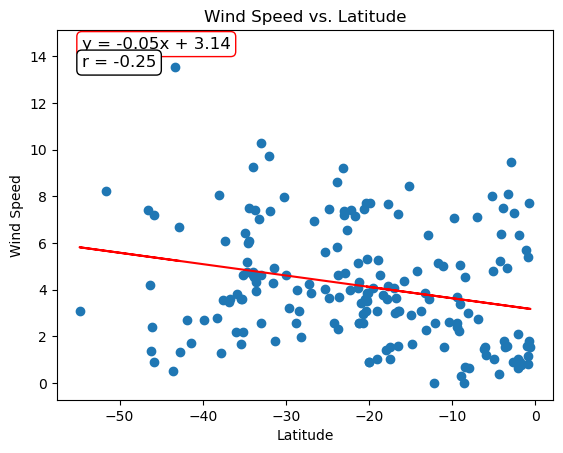

In [53]:
# Southern Hemisphere
# Function to create a scatter plot with a linear regression line
def plot_linear_regression(x_data, y_data, x_label, y_label, title):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_data, y_data)
    
    # Create a scatter plot of the data
    plt.scatter(x_data, y_data)
    
    # Calculate the regression line "y values" from the slope and intercept
    reg_values = x_data * slope + intercept
    
    # Plot the regression line
    plt.plot(x_data, reg_values, "r-")
    
    # Annotate the slope and intercept on the plot
    plt.annotate('y = {:.2f}x + {:.2f}'.format(slope, intercept), xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12,
                 bbox=dict(boxstyle="round,pad=0.3", edgecolor='red', facecolor='white', ))
    
    # Annotate the r value (correlation coefficient)
    plt.annotate('r = {:.2f}'.format(r_value), xy=(0.05, 0.90), xycoords='axes fraction', fontsize=12,
                 bbox=dict(boxstyle="round,pad=0.3", facecolor='white', ))
    
    # Add labels and title
    plt.xlabel('Latitude')
    plt.ylabel('Wind Speed')
    plt.title('Wind Speed vs. Latitude')
    
    # Show plot
    plt.show()
    
    # Return the slope, intercept, and r_value
    return slope, intercept, r_value

# Northern Hemisphere DataFrame
southern_df = southern_hemisphere_df[southern_hemisphere_df['Lat'] <= 0]

# Call the function with relevant columns
slope, intercept, r_value = plot_linear_regression(southern_df['Lat'], southern_df['Wind Speed'], 'Latitude', 'Wind Speed', 'Southern Hemisphere - Wind Speed vs. Latitude')


Discussion about the linear relationship:

In the Northern Hemisphere, the linear regression indicates a slight positive correlation with an R-value of 0.17. This suggests that as one moves away from the equator towards the North Pole, there is a small increase in wind speed. However, the correlation is weak, implying that latitude is not a strong predictor of wind speed in the Northern Hemisphere.

Conversely, the Southern Hemisphere shows a very weak positive correlation with an R-value of -0.25. This indicates that latitude has an even lesser impact on wind speed as one moves away from the equator towards the South Pole.

The low R-values in both hemispheres suggest that factors other than latitude may have a more significant role in determining wind speed. The plots illustrate this weak relationship with a wide dispersion of data points around the regression lines, indicating high variability in wind speed that is not well explained by latitude alone.

Humidity vs. Latitude Linear Regression 

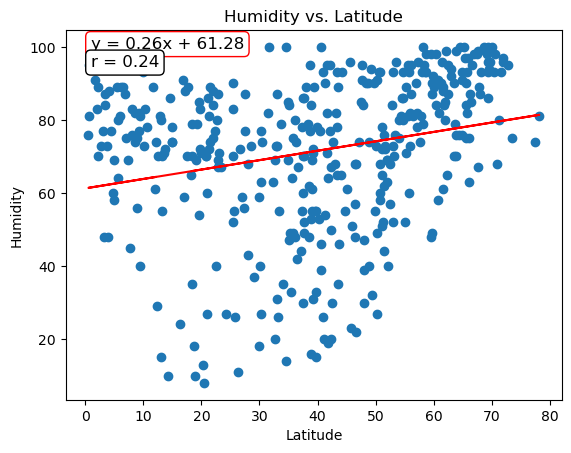

In [56]:
#Northern Hemisphere
# Function to create a scatter plot with a linear regression line
def plot_linear_regression(x_data, y_data, x_label, y_label, title):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_data, y_data)
    
    # Create a scatter plot of the data
    plt.scatter(x_data, y_data)
    
    # Calculate the regression line "y values" from the slope and intercept
    reg_values = x_data * slope + intercept
    
    # Plot the regression line
    plt.plot(x_data, reg_values, "r-")
    
    # Annotate the slope and intercept on the plot
    plt.annotate('y = {:.2f}x + {:.2f}'.format(slope, intercept), xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12,
                 bbox=dict(boxstyle="round,pad=0.3", edgecolor='red', facecolor='white', ))
    
    # Annotate the r value (correlation coefficient)
    plt.annotate('r = {:.2f}'.format(r_value), xy=(0.05, 0.90), xycoords='axes fraction', fontsize=12,
                 bbox=dict(boxstyle="round,pad=0.3", facecolor='white', ))
    
    # Add labels and title
    plt.xlabel('Latitude')
    plt.ylabel('Humidity')
    plt.title('Humidity vs. Latitude')
    
    # Show plot
    plt.show()
    
    # Return the slope, intercept, and r_value
    return slope, intercept, r_value

# Northern Hemisphere DataFrame
northern_df = northern_hemisphere_df[northern_hemisphere_df['Lat'] >= 0]

# Call the function with relevant columns
slope, intercept, r_value = plot_linear_regression(northern_df['Lat'], northern_df['Humidity'], 'Latitude', 'Humidity', 'Northern Hemisphere - Humidity vs. Latitude')


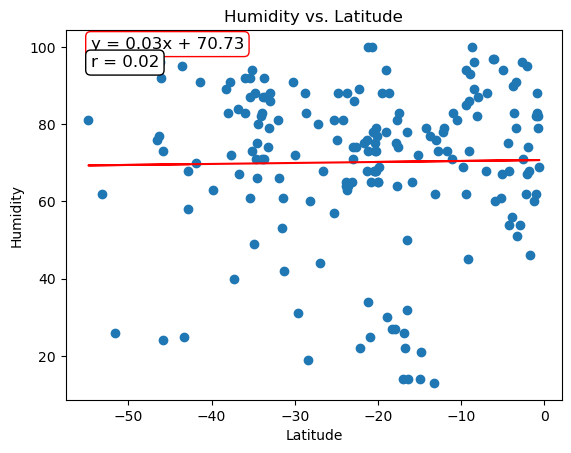

In [58]:
#Southern Hemisphere
# Function to create a scatter plot with a linear regression line
def plot_linear_regression(x_data, y_data, x_label, y_label, title):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_data, y_data)
    
    # Create a scatter plot of the data
    plt.scatter(x_data, y_data)
    
    # Calculate the regression line "y values" from the slope and intercept
    reg_values = x_data * slope + intercept
    
    # Plot the regression line
    plt.plot(x_data, reg_values, "r-")
    
    # Annotate the slope and intercept on the plot
    plt.annotate('y = {:.2f}x + {:.2f}'.format(slope, intercept), xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12,
                 bbox=dict(boxstyle="round,pad=0.3", edgecolor='red', facecolor='white', ))
    
    # Annotate the r value (correlation coefficient)
    plt.annotate('r = {:.2f}'.format(r_value), xy=(0.05, 0.90), xycoords='axes fraction', fontsize=12,
                 bbox=dict(boxstyle="round,pad=0.3", facecolor='white', ))
    
    # Add labels and title
    plt.xlabel('Latitude')
    plt.ylabel('Humidity')
    plt.title('Humidity vs. Latitude')
    
    # Show plot
    plt.show()
    
    # Return the slope, intercept, and r_value
    return slope, intercept, r_value

# southern Hemisphere DataFrame
southern_df = southern_hemisphere_df[southern_hemisphere_df['Lat'] <= 0]

# Call the function with relevant columns
slope, intercept, r_value = plot_linear_regression(southern_df['Lat'], southern_df['Humidity'], 'Latitude', 'Humidity', 'Southern Hemisphere - Humidity vs. Latitude')


Discussion about the linear relationship: 

For the Northern Hemisphere:The R-value is approximately 0.24, indicating a weak positive correlation between humidity and latitude. This suggests that as one moves further north from the equator, there is a slight tendency for humidity to increase, but the relationship is not very strong.
For the Southern Hemisphere: The R-value is very close to zero (0.02), implying an extremely weak or no correlation between humidity and latitude. This indicates that in the Southern Hemisphere, latitude is not a significant predictor of humidity levels, as the data points are widely dispersed and do not show a clear trend with latitude.
Overall, the plots suggest that humidity does not have a strong dependence on latitude, especially in the Southern Hemisphere, where the correlation is almost negligible. This could indicate that other factors, such as ocean currents, wind patterns, or geographical features, may have a more significant impact on humidity levels than the mere distance from the equator.